# Lineare Kleinste Quadrate, Tikhonov-Regularisierung, Landweber-GD

Gegeben seien die folgenden Daten

| $x_{1,i}$ | 1   | 1  | 0  | 6  | 1   | 1   |
|-----------|-----|----|----|----|-----|-----|
| $x_{2,i}$ | 10  | 5  | 2  | 12 | 7   | 7   |
| $y$       | -37 | -2 | -7 | 66 | -14 | -19 |

## Lineare Kleinste Quardrate

Berechnen Sie mit der kleinste-Quadrate-Methode die Parameter für eine lineare Funktion der Form

$$y = p(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2$$

In [19]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)

X1 = np.array([1, 1, 0, 6, 1, 1])
X2 = np.array([10, 5, 2, 12, 7, 7])

y = np.array([-37, -2, -7, 66,  -14, -19])

In [69]:
n = len(X1)
X = np.stack([np.ones(n), X1, X2]).T

print(X)
print(y)

W = np.linalg.lstsq(X, y, rcond=None)[0]
print(f'w0 = {W[0]:.4f}, w1 = {W[1]:.4f}, w2 = {W[2]:.4f}')

[[ 1.  1. 10.]
 [ 1.  1.  5.]
 [ 1.  0.  2.]
 [ 1.  6. 12.]
 [ 1.  1.  7.]
 [ 1.  1.  7.]]
[-37  -2  -7  66 -14 -19]
w0 = 7.2138, w1 = 23.2600, w2 = -6.7182


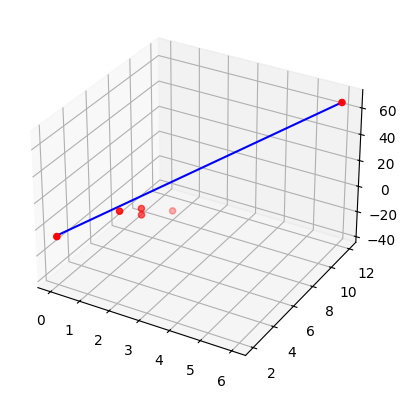

In [25]:
X1_test = np.linspace(np.min(X1), np.max(X1))
X2_test = np.linspace(np.min(X2), np.max(X2))
y_test = W[0] + W[1] * X1_test + W[2] * X2_test

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, y, color='r')
ax.plot(X1_test, X2_test, y_test, color='b')

plt.show()

## Tikhonov-Regularisierung / Ridge-Regression

*Wiederholen Sie diesen Vorgang, aber nun mittels Tikhonov-Regularisierung (Ridge-Regression) mit Parameter $\mu=0.13$*

$$
f_{\operatorname{reg}}(\mathbf{w}) = \Vert \mathbf{y} - \mathbf{Xw} \Vert_2^2 + \mu \Vert\mathbf{w} \Vert_2^2,~~\mu\ge0
$$

$$
\begin{align*}
\Vert \mathbf{y} - \mathbf{Xw} \Vert_2^2 + \mu \Vert\mathbf{w} \Vert_2^2
&=\left \Vert \begin{bmatrix} \mathbf{y} - \mathbf{Xw} \\ \sqrt\mu \mathbf{w} \end{bmatrix} \right \Vert_2^2 \\
&=\left \Vert \begin{bmatrix} \mathbf{y} \\ \mathbf0 \end{bmatrix} - \begin{bmatrix} \mathbf{X} \\ \sqrt\mu \mathbf{E}_m \end{bmatrix} \mathbf{w} \right \Vert_2^2 \\
&= \Vert \mathbf{\tilde y} - \mathbf{\tilde X w} \Vert_2^2
\end{align*}
$$

In [110]:
np.concatenate((y, np.zeros(3)))

array([-37.,  -2.,  -7.,  66., -14., -19.,   0.,   0.,   0.])

In [113]:
mu = 0.13
m = 3       # 3 Gewichte

y_snake = np.concatenate((y, np.zeros(m)))
X_snake = np.vstack([X, np.sqrt(mu) * np.eye(m)])

print(X_snake)
print(y_snake)

W_snake = np.linalg.lstsq(X_snake, y_snake, rcond=None)[0]
print(f'W~0 = {W_snake[0]:.4f}, W~1 = {W_snake[1]:.4f}, W~2 = {W_snake[2]:.4f}')

[[ 1.      1.     10.    ]
 [ 1.      1.      5.    ]
 [ 1.      0.      2.    ]
 [ 1.      6.     12.    ]
 [ 1.      1.      7.    ]
 [ 1.      1.      7.    ]
 [ 0.3606  0.      0.    ]
 [ 0.      0.3606  0.    ]
 [ 0.      0.      0.3606]]
[-37.  -2.  -7.  66. -14. -19.   0.   0.   0.]
W~0 = 5.6051, W~1 = 22.7855, W~2 = -6.4003


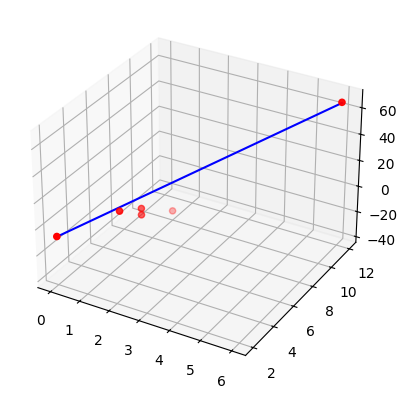

In [116]:
X1_snake_test = np.linspace(np.min(X1), np.max(X1))
X2_snake_test = np.linspace(np.min(X2), np.max(X2))
y_snake_test = W_snake[0] + W_snake[1] * X1_snake_test + W_snake[2] * X2_snake_test

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, y, color='r')
ax.plot(X1_snake_test, X2_snake_test, y_snake_test, color='b')

plt.show()

## Gradienten-Abstiegsverfahren

*Die iterative näherungsweise Lösung mit dem Gradienten-Abstiegsverfahren beinhaltet in gewissen weise auch eine Regularisierung. Führen Sie ausgehend vom Startvektor $\mathbf{w}^{(0)} = (1,0,0)^{\operatorname{T}}$ für obige Aufgabe $5$ Schritte des Gradienten-Abstiegsverfahren (hier Landweber-Iteration) mit Schrittweite $\alpha=0.001$ aus.*

In [125]:
def gd_landweber(X, y, w_0, alpha, max_iter):
    w_k = w_0
    print(f'0: w_k = {w_k}')
    for k in range(1, max_iter + 1):
        w_k = w_k - alpha * X.T @ (X @ w_k - y)
        print(f'{k}: w_k = {w_k}')
    return w_k

In [130]:
w_0 = np.array([1, 0, 0]).T
alpha = 0.001
max_iter = 5

W_landweber = gd_landweber(X, y, w_0, alpha, 5)

0: w_k = [1 0 0]
1: w_k = [0.981 0.314 0.124]
2: w_k = [0.9536 0.6031 0.1711]
3: w_k = [0.9215 0.8762 0.1727]
4: w_k = [0.8868 1.1385 0.1475]
5: w_k = [0.8508 1.3932 0.1067]


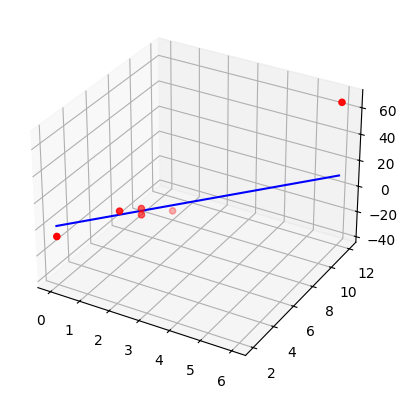

In [131]:
X1_test = np.linspace(np.min(X1), np.max(X1))
X2_test = np.linspace(np.min(X2), np.max(X2))
y_test = W_landweber[0] + W_landweber[1] * X1_test + W_landweber[2] * X2_test

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, y, color='r')
ax.plot(X1_test, X2_test, y_test, color='b')

plt.show()